In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression



from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler , RobustScaler
from sklearn.model_selection import cross_val_score
data = pd.read_csv('E:/term6/Machine Learning/indian_liver_patient.csv')
# data = pd.read_csv('C:/Users/TOSHIBA/Desktop/ML_Project/indian_liver_patient.csv')

In [2]:
print(data)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
5     46    Male              1.8               0.7                   208   
6     26  Female              0.9               0.2                   154   
7     29  Female              0.9               0.3                   202   
8     17    Male              0.9               0.3                   202   
9     55    Male              0.7               0.2                   290   
10    57    Male              0.6               0.1                   210   
11    72    Male              2.7               1.3                   260   

In [3]:
for item in data["Gender"]:
    data["Gender"] = data["Gender"].replace("Female", 1)
    data["Gender"] = data["Gender"].replace("Male", 0)
print(data["Gender"].head(10))


0    1
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    0
9    0
Name: Gender, dtype: int64


In [4]:
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

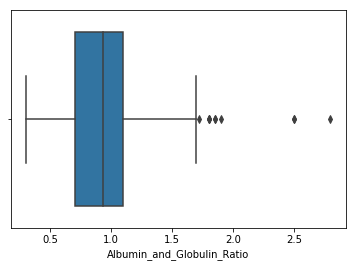

In [5]:
sb.boxplot(data.Albumin_and_Globulin_Ratio)

In [6]:
x = data['Albumin_and_Globulin_Ratio'].median()
data['Albumin_and_Globulin_Ratio'].fillna(x, inplace = True)

In [7]:
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [8]:
data.drop_duplicates(inplace=True)

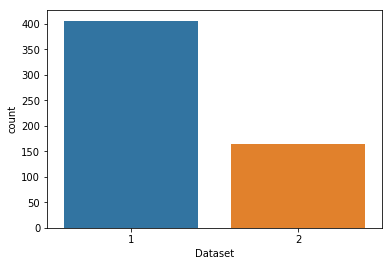

In [9]:
sb.countplot(x='Dataset', data=data)

In [10]:
x = np.array(data.drop(['Dataset'], axis=1))
y = np.array(data['Dataset'])

In [11]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print(Counter(y))

smote = SMOTE()
x, y = smote.fit_resample(x, y)
print(Counter(y))

data = pd.DataFrame(x)
data['Dataset'] = y
data.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset']
print(data)

Counter({1: 406, 2: 164})
Counter({1: 406, 2: 406})
           Age    Gender  Total_Bilirubin  Direct_Bilirubin  \
0    65.000000  1.000000         0.700000          0.100000   
1    62.000000  0.000000        10.900000          5.500000   
2    62.000000  0.000000         7.300000          4.100000   
3    58.000000  0.000000         1.000000          0.400000   
4    72.000000  0.000000         3.900000          2.000000   
5    46.000000  0.000000         1.800000          0.700000   
6    26.000000  1.000000         0.900000          0.200000   
7    29.000000  1.000000         0.900000          0.300000   
8    17.000000  0.000000         0.900000          0.300000   
9    55.000000  0.000000         0.700000          0.200000   
10   57.000000  0.000000         0.600000          0.100000   
11   72.000000  0.000000         2.700000          1.300000   
12   64.000000  0.000000         0.900000          0.300000   
13   74.000000  1.000000         1.100000          0.400000   
14 

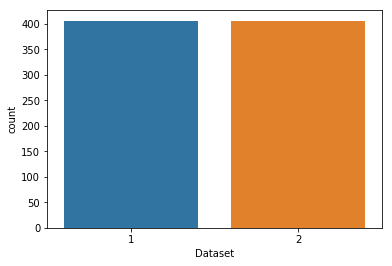

In [12]:
sb.countplot(x='Dataset', data=data)

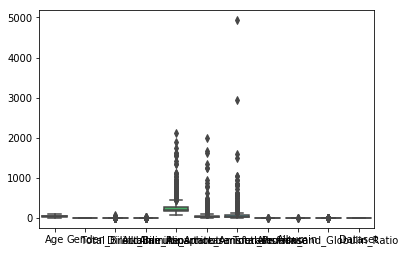

In [13]:
data = data.dropna(axis = 0)
sb.boxplot(data = data)

In [14]:
cols = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']
fea = data[cols]
scaler = RobustScaler()
fea = scaler.fit_transform(fea.values)
data[cols] = fea
# data = pd.DataFrame(data)
# data.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset']
print(data)

          Age    Gender  Total_Bilirubin  Direct_Bilirubin  \
0    0.808731  2.076342        -0.191267         -0.285075   
1    0.688802  0.000000         9.563363          8.714925   
2    0.688802  0.000000         6.120552          6.381592   
3    0.528897  0.000000         0.095634          0.214925   
4    1.088566  0.000000         2.869009          2.881592   
5    0.049180  0.000000         0.860703          0.714925   
6   -0.750349  2.076342         0.000000         -0.118408   
7   -0.630419  2.076342         0.000000          0.048258   
8   -1.110136  0.000000         0.000000          0.048258   
9    0.408967  0.000000        -0.191267         -0.118408   
10   0.488920  0.000000        -0.286901         -0.285075   
11   1.088566  0.000000         1.721405          1.714925   
12   0.768755  0.000000         0.000000          0.048258   
13   1.168519  2.076342         0.191267          0.214925   
14   0.648826  0.000000        -0.191267         -0.118408   
15  -0.7

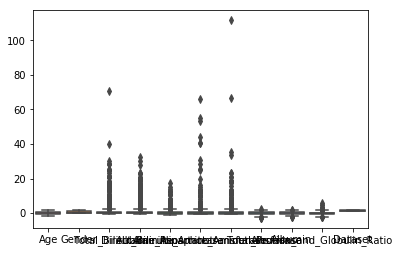

In [15]:
# data = data.dropna(axis = 0)
sb.boxplot(data = data)

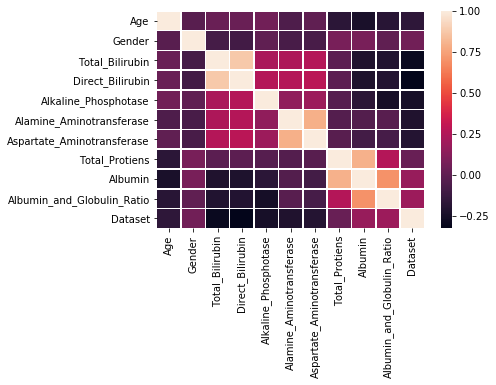

In [16]:
corr = data.corr()
ax = sb.heatmap(corr, linewidth=0.5)
plt.show()

In [17]:
data.drop(['Age', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin_and_Globulin_Ratio'], inplace=True, axis = 1)
print(data)

       Gender  Total_Bilirubin  Alamine_Aminotransferase   Albumin  Dataset
0    2.076342        -0.191267                 -0.502861  0.090731        1
1    0.000000         9.563363                  1.106295  0.000000        1
2    0.000000         6.120552                  0.972198  0.090731        1
3    0.000000         0.095634                 -0.569909  0.181461        1
4    0.000000         2.869009                 -0.134096 -0.725845        1
5    0.000000         0.860703                 -0.402289  1.088768        1
6    2.076342         0.000000                 -0.502861  0.272192        1
7    2.076342         0.000000                 -0.569909  0.362923        1
8    0.000000         0.000000                 -0.301717  0.816576        2
9    0.000000        -0.191267                  0.737530  0.181461        1
10   0.000000        -0.286901                  0.670482 -0.453653        1
11   0.000000         1.721405                  0.000000 -0.181461        1
12   0.00000

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4)

In [19]:
print(data)

       Gender  Total_Bilirubin  Alamine_Aminotransferase   Albumin  Dataset
0    2.076342        -0.191267                 -0.502861  0.090731        1
1    0.000000         9.563363                  1.106295  0.000000        1
2    0.000000         6.120552                  0.972198  0.090731        1
3    0.000000         0.095634                 -0.569909  0.181461        1
4    0.000000         2.869009                 -0.134096 -0.725845        1
5    0.000000         0.860703                 -0.402289  1.088768        1
6    2.076342         0.000000                 -0.502861  0.272192        1
7    2.076342         0.000000                 -0.569909  0.362923        1
8    0.000000         0.000000                 -0.301717  0.816576        2
9    0.000000        -0.191267                  0.737530  0.181461        1
10   0.000000        -0.286901                  0.670482 -0.453653        1
11   0.000000         1.721405                  0.000000 -0.181461        1
12   0.00000

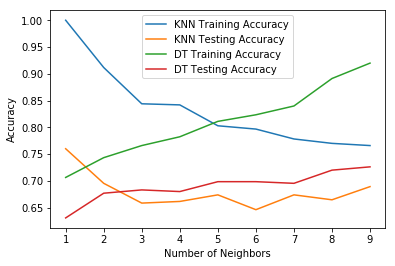

Decision Tree Testing Accuracy: 71.69%
Decision Tree Trainning Accuracy: 91.99%
KNN Testing Accuracy: 76.00%
KNN Training Accuracy: 100.00%


In [20]:
neighbors = np.arange(1, 10)
train_accuracies = {}
test_accuracies = {}
tmp1 = 0
tmp2 = 0

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(x_train, y_train)
    train_accuracies[neighbor] = knn.score(x_train, y_train)
    test_accuracies[neighbor] = knn.score(x_test, y_test)
    if tmp1 < knn.score(x_test, y_test):
        tmp1 = knn.score(x_test, y_test)
        k = neighbor

plt.plot(neighbors, train_accuracies.values(), label="KNN Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="KNN Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")


depths = np.arange(1, 10)
train_accuracies = {}
test_accuracies = {}

for depth in depths:
    DT = DecisionTreeClassifier(max_depth=depth)
    DT.fit(x_train, y_train)
    train_accuracies[depth] = DT.score(x_train, y_train)
    test_accuracies[depth] = DT.score(x_test, y_test)
    if tmp2 < DT.score(x_test, y_test):
        tmp2 = DT.score(x_test, y_test)
        d = depth
plt.plot(depths, train_accuracies.values(), label="DT Training Accuracy")
plt.plot(depths, test_accuracies.values(), label="DT Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

classifier = DecisionTreeClassifier(max_depth=d)
c=classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)
print('Decision Tree Testing Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_predict)*100 ))
print('Decision Tree Trainning Accuracy: {:.2f}%'.format(classifier.score(x_train,y_train)*100 ))



k_classifier = KNeighborsClassifier(n_neighbors=k)
k = k_classifier.fit(x_train,y_train)
y_predict = k_classifier.predict(x_test)
print('KNN Testing Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_predict)*100 ))
print('KNN Training Accuracy: {:.2f}%'.format(k_classifier.score(x_train,y_train)*100 ))

C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn

C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (37) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (38) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (39) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\TOSHIBA\Anaconda3\lib\site-packages\skl

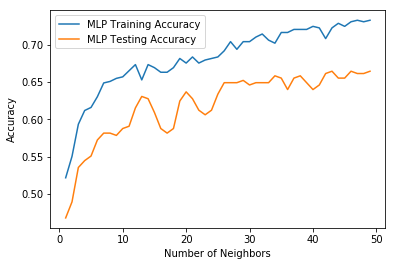

In [21]:
iters = np.arange(1, 50)
train_accuracies = {}
test_accuracies = {}
tmp3 = 0

for iterr in iters:
    mlp = MLPClassifier(
    max_iter=iterr,
    alpha=0.1,
    activation='logistic',
    solver='adam',
    random_state=42
    )
    mlp.fit(x_train, y_train)
    train_accuracies[iterr] = mlp.score(x_train, y_train)
    test_accuracies[iterr] = mlp.score(x_test, y_test)
plt.plot(iters, train_accuracies.values(), label="MLP Training Accuracy")
plt.plot(iters, test_accuracies.values(), label="MLP Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()


In [22]:
mlp = MLPClassifier(
    max_iter=1000,
    random_state=42
)
mlp.fit(x_train, y_train)
mlp_predict = mlp.predict(x_test)
print('MLP Testing Accuracy: {:.2f}%'.format(accuracy_score(y_test, mlp_predict) * 100))
print('MLP Training Accuracy: {:.2f}%'.format(mlp.score(x_train, y_train) * 100))

MLP Testing Accuracy: 67.38%
MLP Training Accuracy: 75.15%
